<a href="https://colab.research.google.com/github/NotAhmadRaza/PyTorch/blob/main/02_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pytorch Workflow

*What we are covering:*

1   **Getting data ready**

2  **Building a model**

3   **Fitting the model to data (training)**

4   **Making predictions and evaluating a model (inference)**

5    **Saving and loading a model**

6    **Putting it all together**

In [1]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.1+cu118'

## Data (preparing and loading)

Data can be almost anything....... in machine learning

Like:

* Excel Spreadsheet
* Images of any Kind
* Audio
* Video
* DNA
* Text


Machine learning is a game of two parts:
1. Get data into numerical representation
2. Build a model to learn patterns in that numerical representation

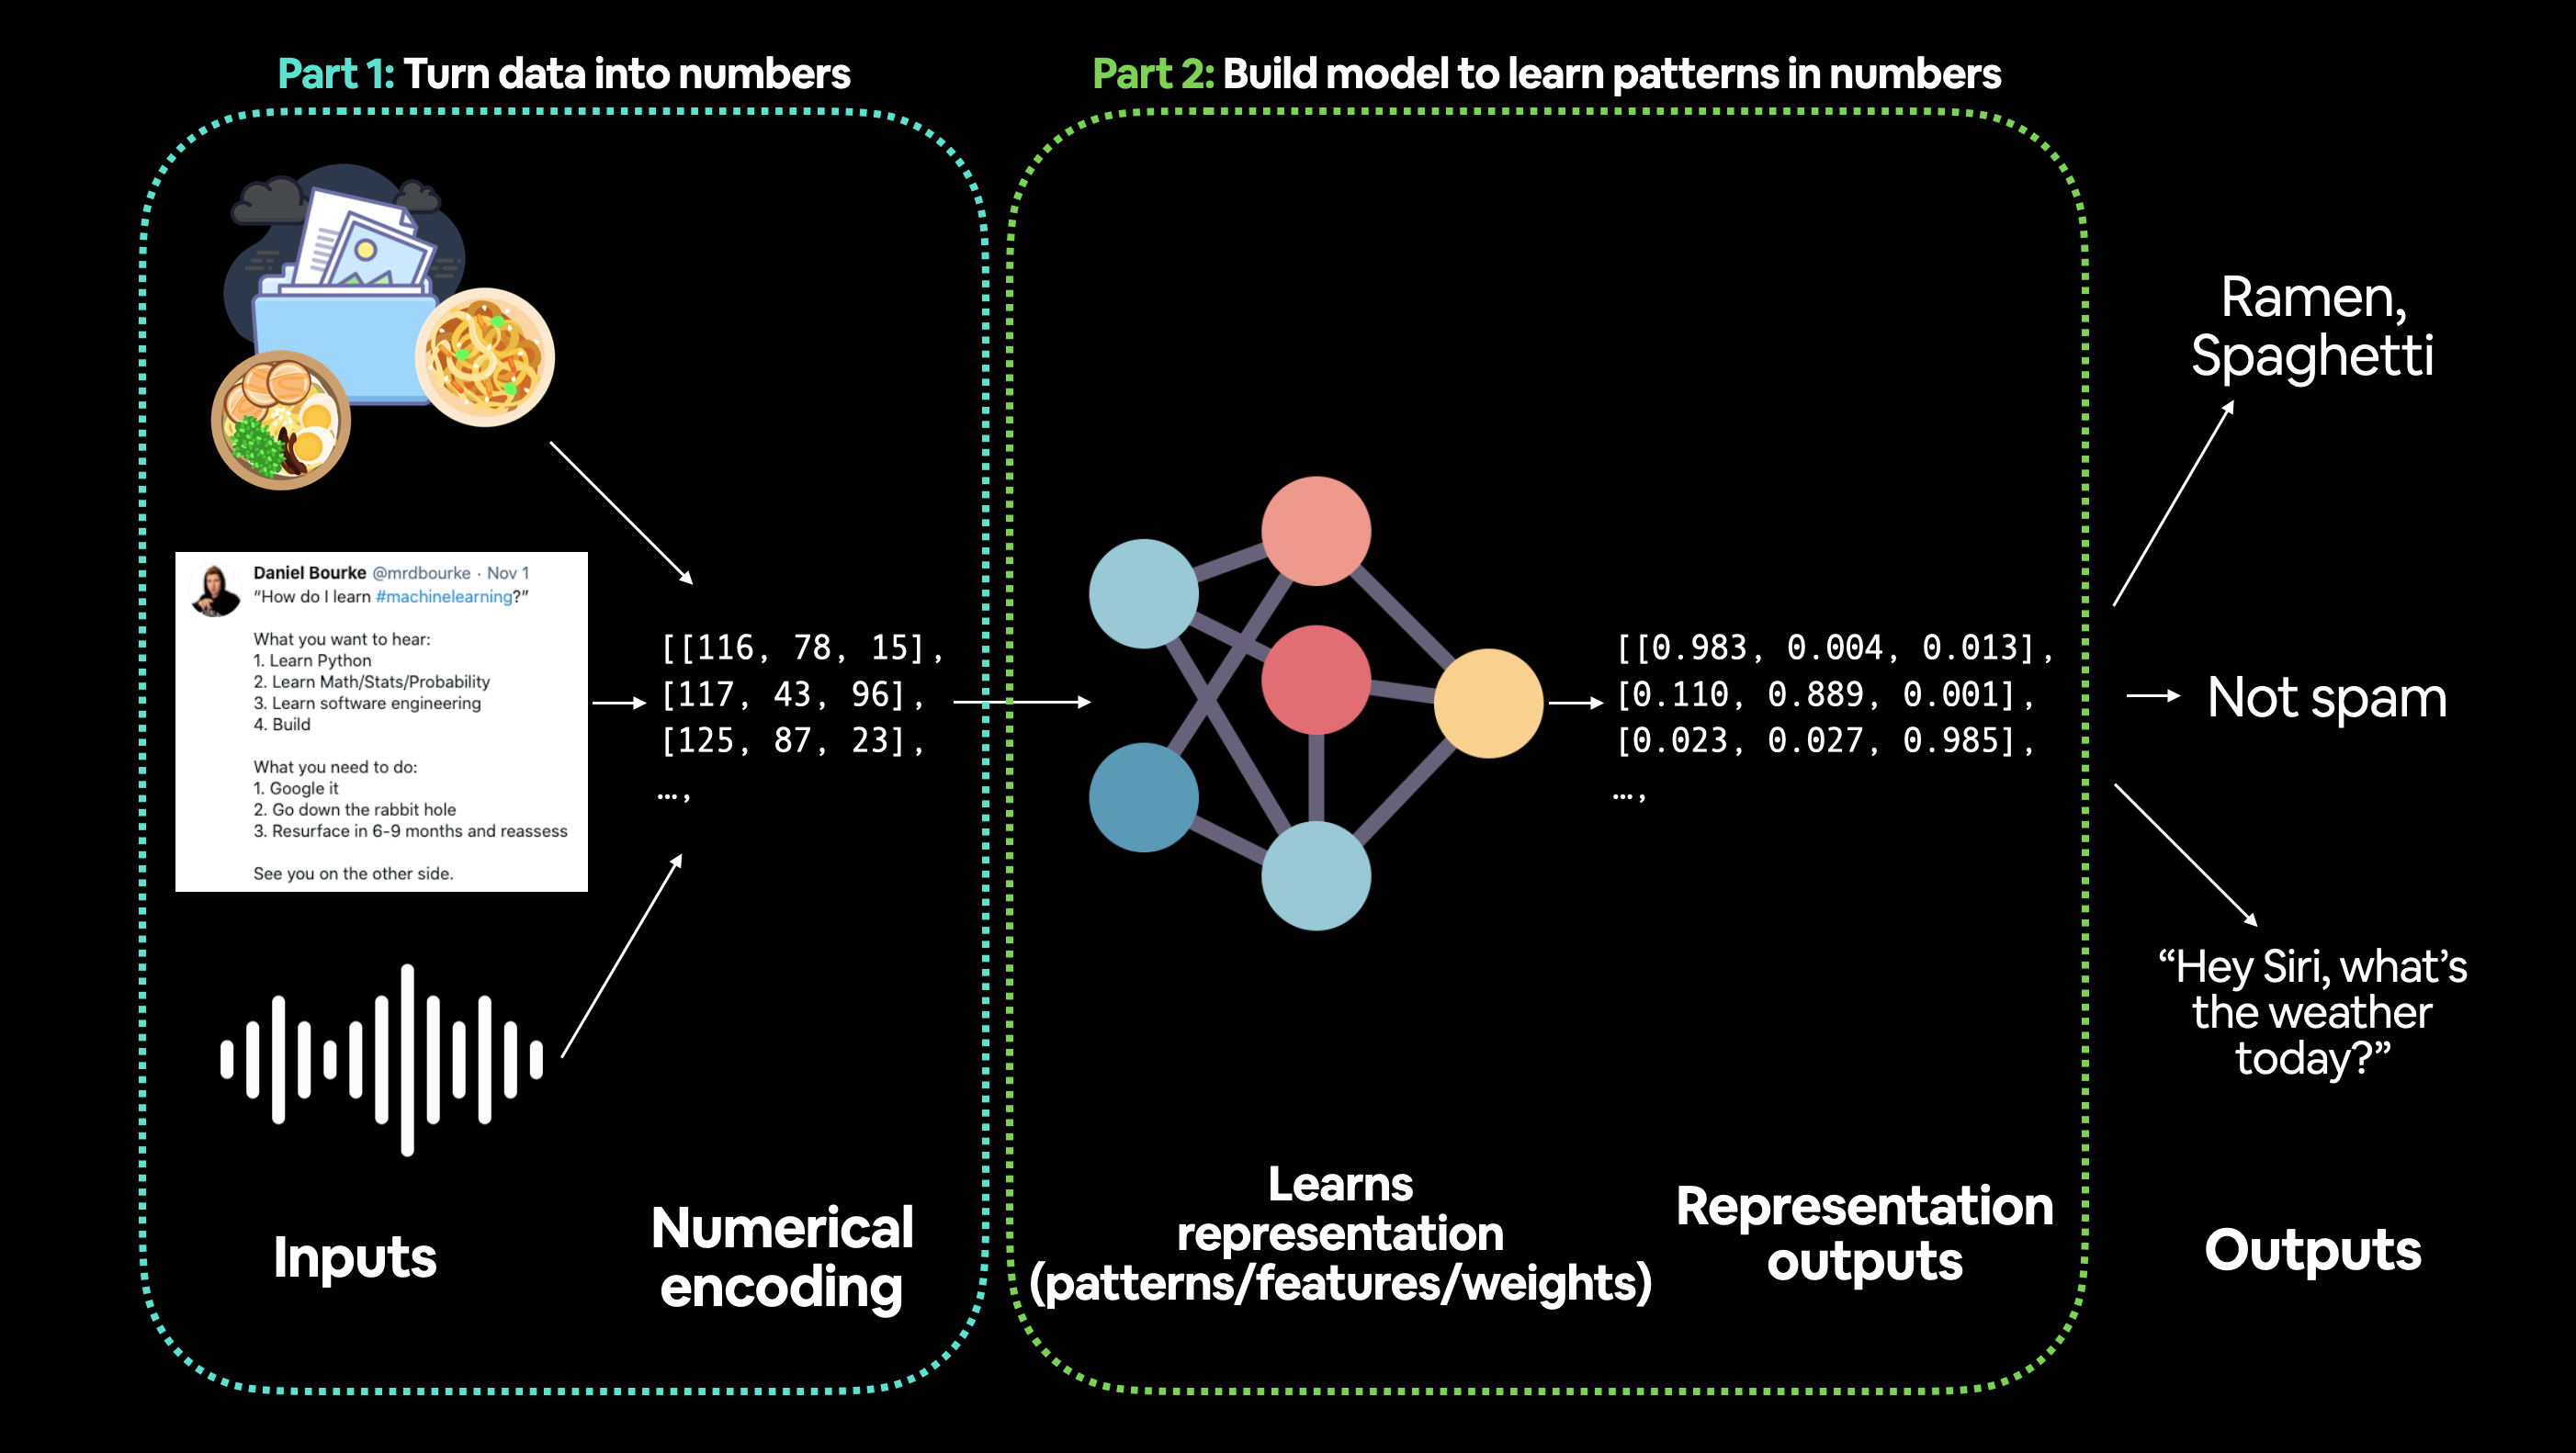

Let's create our data as a straight line.

We'll use linear regression to create the data with known parameters (things that can be learned by a model) and then we'll use PyTorch to see if we can build model to estimate these parameters using **gradient descent**.

In [13]:
# Create a parameters
import torch
weight =0.7
bias = 0.3

# Create
start=0
end = 1
step =0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
# y= bx+ c   // b: weight , x: X , c: bias
y= weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [14]:
len(y), len(X)

(50, 50)

## Split data into training and test sets

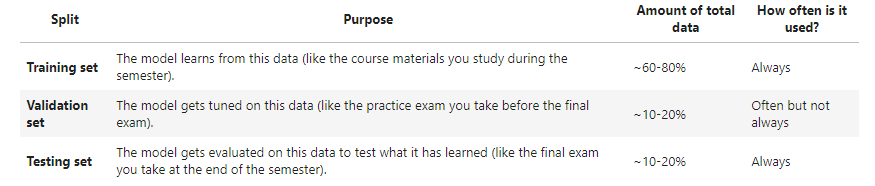


In [18]:
# Create a training set
train_split = int(0.8 * len(X)) # 80% of data used for training set
X_train, y_train =X[:train_split] ,y[:train_split]

# Create testing test
X_test ,y_test = X[train_split:] ,y[train_split:] # 20% for testing

print ("Legnth of Training set X: " , len(X_train))
print ("Legnth of Training set Y: " , len(y_train))
print ("Legnth of Testing set X: " , len(X_test))
print ("Legnth of Training set Y: " , len(y_test))



Legnth of Training set X:  40
Legnth of Training set Y:  40
Legnth of Testing set X:  10
Legnth of Training set Y:  10


## Let's create a function to visualize it.

In [25]:
import matplotlib.pyplot as plt

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in yellow
  plt.scatter(train_data, train_labels, c="y", s=4, label="Training data")

  # Plot test data in blue
  plt.scatter(test_data, test_labels, c="b", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})


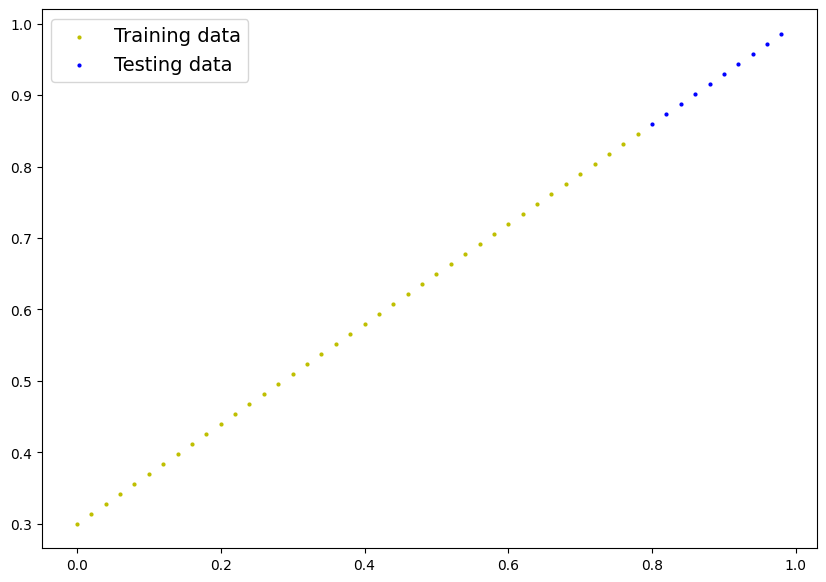

In [26]:
plot_predictions();